# Es un pájaro, es un avión...

- Pau Adell Raventos
- Iván González Reguera
- José Morote García
- Joan Sales De Marcos

CIFAR-105 es uno de los muchos conjuntos de imágenes que existen para poder hacer experimentos. Este conjunto tiene imágenes de 32 × 32 de 10 clases diferentes. Dos de esas clases son pájaro y avión. Uno pensaría que debería ser fácil el poder distinguir ejemplos de estas dos clases, el detalle es que muchas veces son imágenes en la que su mayor parte corresponde al cielo y el objeto puede ocupar una parte relativamente pequeña de la imagen. El objetivo de este problema es experimentar con diferentes redes que usan capas convolucionales para ver cual es el nivel de acierto al que se puede llegar.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix

# Apartado A

El conjunto de imágenes es de 32x32 en formato RGB de 10 clases diferentes. Dos de esas clases son pájaro y avión.

El objetivo de este problema es experimentar con diferentes redes que usan capas convolucionales para ver cuál es el nivel de acierto al que se puede llegar, con el fin de distinguir entre avión o pájaro.

El primer paso será cargar los datos:

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Podemos observar cómo son las imágenes, y algunas de las clases de este dataset:

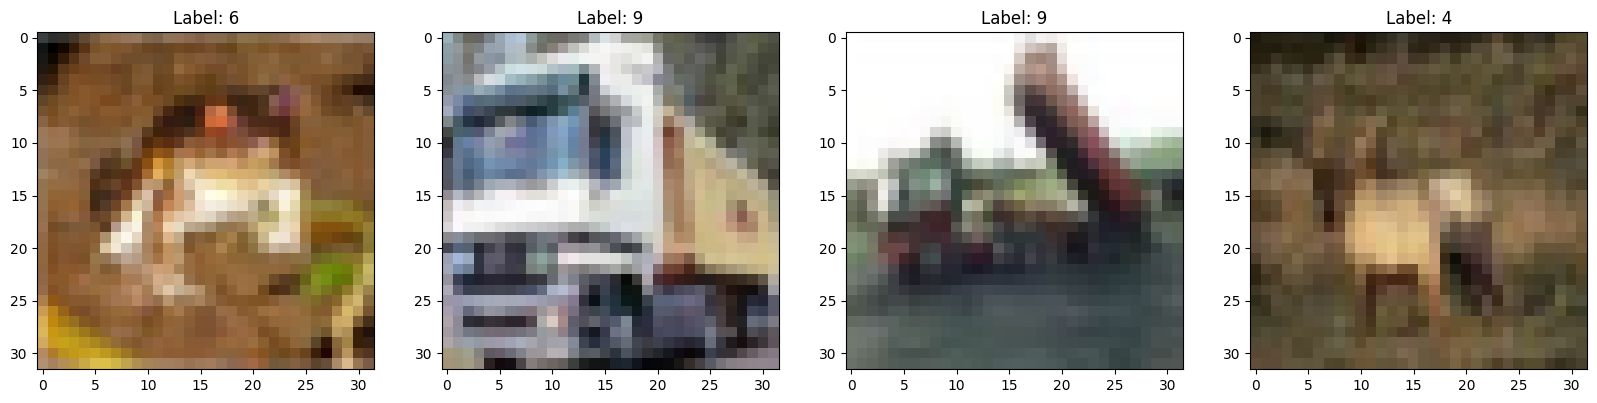

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
imshow(X_train[0])
plt.title('Label: {}'.format(y_train[0]))

plt.subplot(1, 4, 2)
imshow(X_train[1])
plt.title('Label: {}'.format(y_train[1]))

plt.subplot(1, 4, 3)
imshow(X_train[2])
plt.title('Label: {}'.format(y_train[2]))

plt.subplot(1, 4, 4)
imshow(X_train[3])
plt.title('Label: {}'.format(y_train[3]))

plt.show()

Dado que sólo nos interesan los pájaros y aviones, creamos un nuevo dataset con exclusivamente las imágenes que tienen etiqueta 0 y 2:

In [ ]:
condition = (y_train == 0) | (y_train == 2)
X_train = X_train[condition]
y_train = y_train[condition]

condition = (y_test == 0) | (y_test == 2)
X_test = X_test[condition]
y_test = y_test[condition]

El clasificador espera que el resultado sea binario, es decir, 0 o 1, dado que la última capa es una neurona con activación sigmoide que tendrá 0 o 1 como respuesta, por tanto cambiaremos las etiquetas de los pájaros de ser el 2 a ser el 1:

In [ ]:
y_train[y_train == 2] = 1
y_test[y_test == 2] = 1

Ahora vemos como sólo hay pájaros y aviones en nuestro dataset:

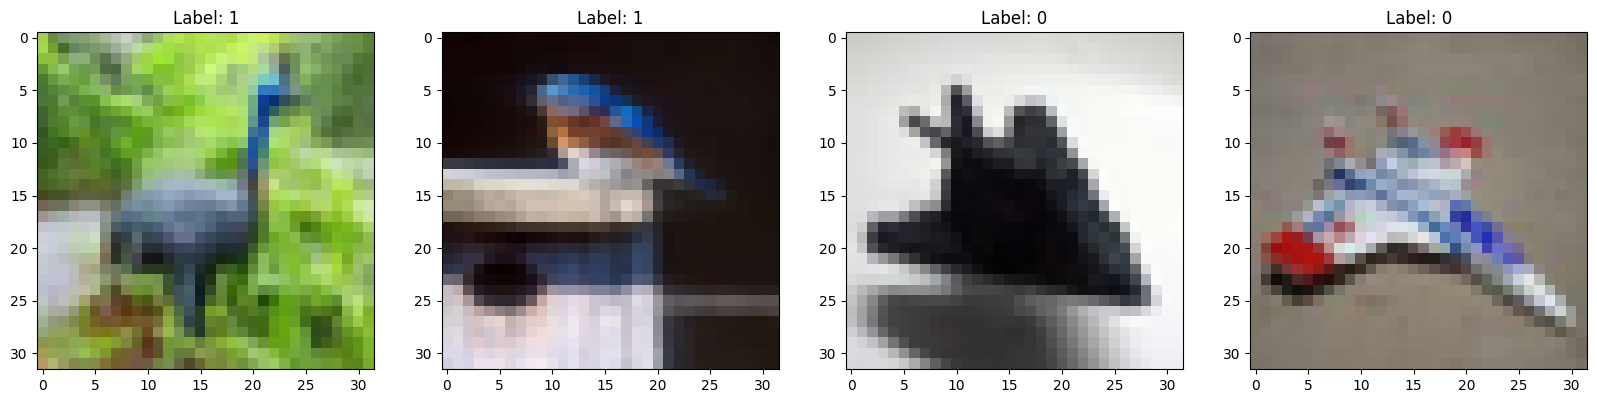

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
imshow(X_train[0])
plt.title('Label: {}'.format(y_train[0]))

plt.subplot(1, 4, 2)
imshow(X_train[1])
plt.title('Label: {}'.format(y_train[1]))

plt.subplot(1, 4, 3)
imshow(X_train[4])
plt.title('Label: {}'.format(y_train[4]))

plt.subplot(1, 4, 4)
imshow(X_train[5])
plt.title('Label: {}'.format(y_train[5]))

plt.show()

Ahora normalizamos las imagenes, dividiendo por el valor máximo de píxel, de manera que los valores de los píxeles quedarán entre 0 y 1.

Normalizar las imágenes nos ayuda a realizar el entrenamiento más rápido y más fácil, dado que converge antes.
Otro motivo de la normalización es el hecho de que muchas funciones de activación, como *sigmoid*, esperan que los rangos de valores se encuentren entre 0 y 1.

Procedemos a realizar la normalización:

In [ ]:
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

In [ ]:
X_train_normalized

array([[[[0.6431373 , 0.80784315, 0.32941177],
         [0.4117647 , 0.54901963, 0.23921569],
         [0.4627451 , 0.5803922 , 0.39607844],
         ...,
         [0.42745098, 0.5764706 , 0.28627452],
         [0.42352942, 0.5764706 , 0.27058825],
         [0.35686275, 0.5058824 , 0.22352941]],

        [[0.654902  , 0.8352941 , 0.32941177],
         [0.45490196, 0.627451  , 0.19215687],
         [0.28235295, 0.42745098, 0.16862746],
         ...,
         [0.4117647 , 0.5568628 , 0.30980393],
         [0.4117647 , 0.5568628 , 0.28235295],
         [0.34901962, 0.49803922, 0.22352941]],

        [[0.54901963, 0.7490196 , 0.25490198],
         [0.5568628 , 0.75686276, 0.25882354],
         [0.46666667, 0.6392157 , 0.30980393],
         ...,
         [0.40784314, 0.54509807, 0.32941177],
         [0.32941177, 0.47058824, 0.22745098],
         [0.30588236, 0.4509804 , 0.19215687]],

        ...,

        [[0.54509807, 0.5803922 , 0.31764707],
         [0.5568628 , 0.60784316, 0.2901961 ]

# Apartado B

En redes neuronales, la regularización es la clave para que no se sobreespecialicen.

Una de las formas de regularizar se llama **dropout**, que es hacer que con cierta probabilidad alguna de las conexiones entre dos capas se hagan cero, descartando la información que llega a través de esa conexión.

La siguiente es una red con una capa convolucional de filtros de tamaño 3x3 que tiene una capa de dropout antes de un MLP con dos capas ocultas. La capa de salida tiene una neurona con activación sigmoide que nos servirá para la clasificación binaria:

In [ ]:
filters = 8
dropouts = [0, 0.2, 0.4, 0.6, 0.8]

all_losses = []
all_val_losses = []
model_list_only_dropout = []

for dropout in dropouts:
    print('Dropout: {}'.format(dropout))
    model = keras.models.Sequential()
    model.add(keras.Input(shape=(32, 32, 3)))
    model.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
    ckpt = keras.callbacks.ModelCheckpoint(f'modelckpt_{dropout}', monitor='val_loss', save_best_only=True, save_weights_only=True)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    res = model.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                    callbacks=[early, ckpt])

    losses = res.history['loss']
    val_losses = res.history['val_loss']

    all_losses.append(losses)
    all_val_losses.append(val_losses)
    print(losses)
    print(val_losses)
    print()

    model_list_only_dropout.append(model)

Dropout: 0
[0.5557329058647156, 0.43038055300712585, 0.40129154920578003, 0.3758579194545746, 0.3565441071987152, 0.34356799721717834, 0.3166951537132263, 0.30753204226493835, 0.2948743999004364, 0.28388890624046326, 0.26268595457077026, 0.2696513235569, 0.26933780312538147, 0.24571740627288818, 0.22139830887317657, 0.22738711535930634, 0.20595014095306396, 0.1910839080810547, 0.1911913901567459, 0.16855326294898987, 0.17311200499534607, 0.15956814587116241, 0.14735786616802216, 0.13826128840446472, 0.12433696538209915, 0.11610794812440872, 0.10500073432922363, 0.09512324631214142, 0.09355475753545761, 0.09860808402299881, 0.0740695521235466]
[0.4825773537158966, 0.3954124450683594, 0.43946853280067444, 0.41570112109184265, 0.35143133997917175, 0.35218068957328796, 0.3374853730201721, 0.331684947013855, 0.3279165029525757, 0.32706418633461, 0.32361510396003723, 0.3586792051792145, 0.32978489995002747, 0.346469521522522, 0.36817771196365356, 0.32720592617988586, 0.3330358564853668, 0.35

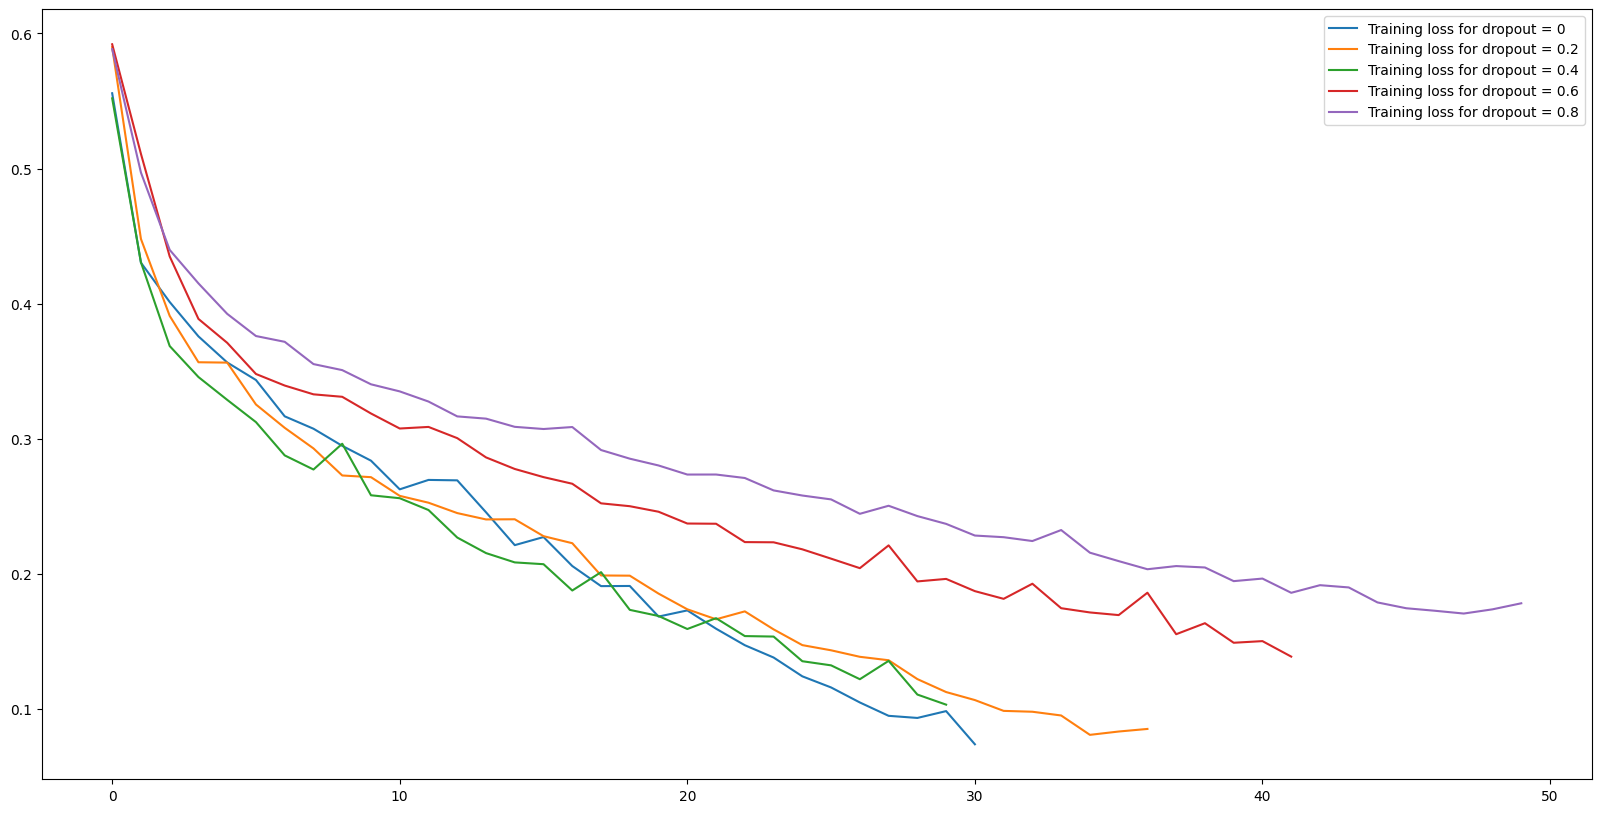

In [ ]:
plt.figure(figsize=(20, 10))

for index, dropout in enumerate(dropouts):
  plt.plot(all_losses[index], label=f"Training loss for dropout = {dropout}")


plt.legend()

Podemos ver cómo las pérdidas para los dos modelos con dropouts más altos (0.6 y 0.8) son las más altas al acabar, también se puede ver cómo hay más valores en la lista debido a que el modelo tarda más en acabar, esto es porque los valores de "val_loss" siguen mejorando durante más tiempo que en el resto de modelos, y no se activa el *early stopping* tan inmediatamente.

También podemos observar cómo los mejores resultados son aquellos con menor dropout. Esto puede ser debido a que cuanta mayor cantidad de conexiones haya en el modelo, mayor capacidad de aprendizaje tiene, y por tanto, menor pérdida mientras va entrenando.

Cabe destacar que estos resultados son en el set de entrenamiento, y los resultados obtenidos pueden ser falsos indicativos de que el mejor modelo es con menor dropout. Este falso indicativo puede venir principalmente de un sobreajustado del modelo, que sucede cuando el modelo captura mucho ruido del set de entrenamiento ya que ha aprendido demasiado bien de los datos, cogiendo características demasiado concretas.

El primer indicativo de este problema presente en nuestro modelo es el hecho de que a pesar de que el modelo con mejor *loss* es aquel sin dropout, el modelo que sigue mejorando el *val_loss* durante mayor tiempo es el de dropout = 0.8 .

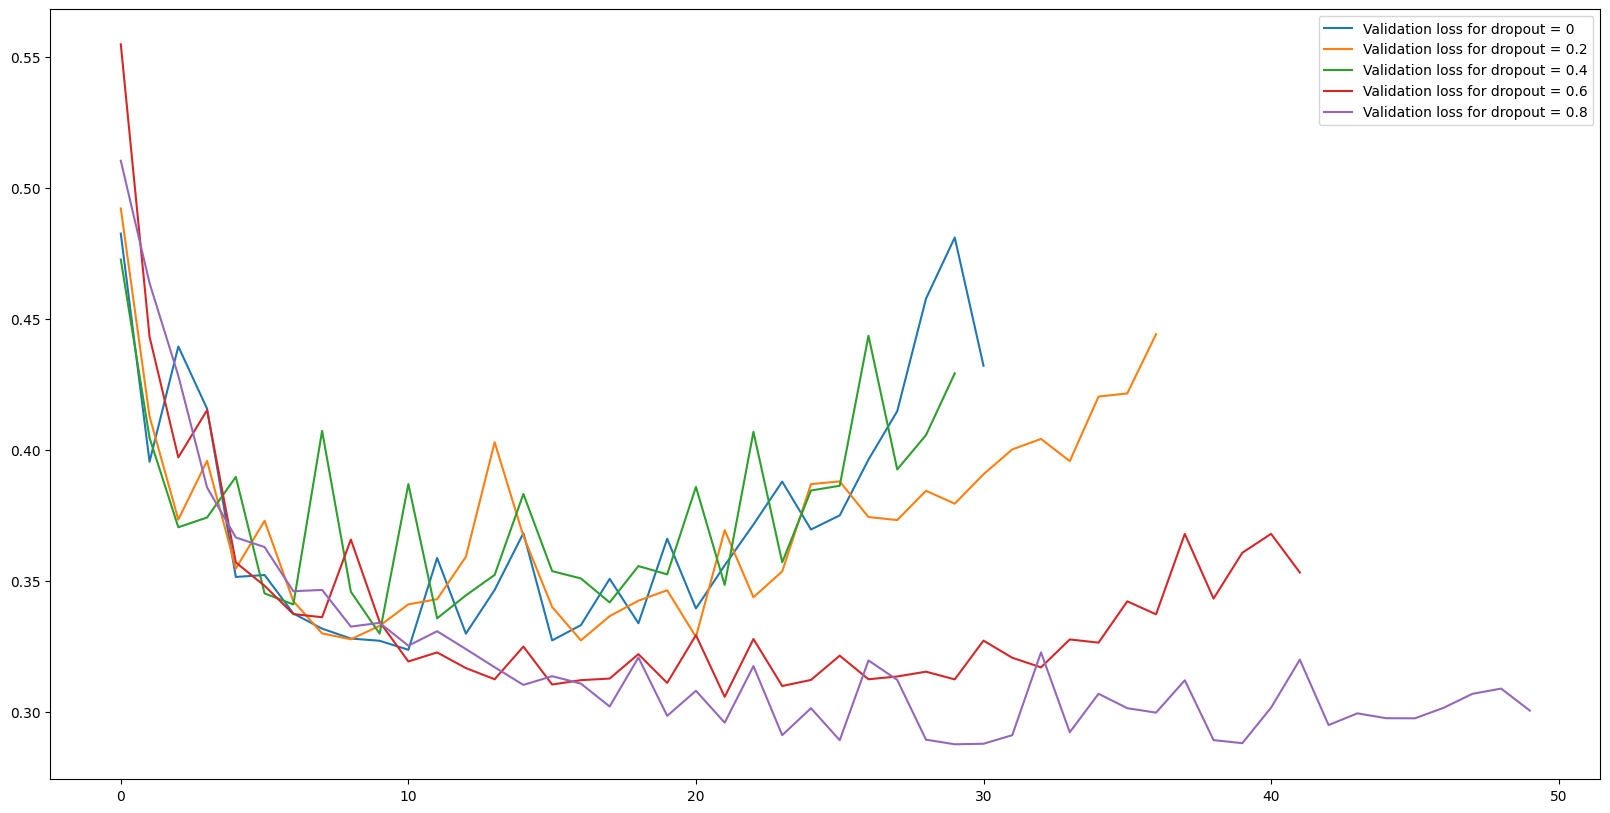

In [ ]:
plt.figure(figsize=(20, 10))

for index, dropout in enumerate(dropouts):
  plt.plot(all_val_losses[index], label=f"Validation loss for dropout = {dropout}")


plt.legend()

Las diferencias respecto al grafo anterior son claras, las pérdidas de validación fluctuan más debido a que, a diferencia de la pérdida del entrenamiento, aquí hay diferencias entre los datos de entrenamiento y de validación. Este comportamiento confirma las sospechas de que el modelo se está sobreajustando o tiene dificultades para generalizar bien los datos no vistos en algunos puntos.

Comentando la imagen, podemos ver que los modelos con dropout más altos acaban con valores de val_loss más bajos, de valores similares y siguiendo una tendencia parecida, lo que significa que son los más capaces de generalizar bien los datos y rendir mejor con imagenes no vistas en el entrenamiento del modelo.

Por otro lado, tanto los modelos con dropout 0 y 0.4 tienen valores más altos al acabar y se aprecian continuas fluctuaciones grandes incluso hacia el final del entreno.

Para acabar, el modelo con dropout = 0.2 está en el medio de ambos, con un valor de val_loss no tan alto como los dos modelos de antes y sin tantas fluctuaciones, pareciéndose a los primeros modelos en este aspecto.

Así a simple vista los modelos que parecen mejores serían los de dropouts de 0.6 y 0.8 ya que, como se ha mencionado anteriormente, son los que mejor funcionan con datos no vistos en el entrenamiento.

Ahora se procederá a aplicar regularización en el MLP, para tratar de mejorar los resultados obtenidos.

Se probará primero con dropout = 0, y luego con dropout = 0.8, utilizando en ambos regularización L2:

In [ ]:
dropout = 0

print('Dropout: {}'.format(dropout))
model_l2_dropout_0 = keras.models.Sequential()
model_l2_dropout_0.add(keras.Input(shape=(32, 32, 3)))
model_l2_dropout_0.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_l2_dropout_0.add(keras.layers.Flatten())
model_l2_dropout_0.add(keras.layers.Dropout(dropout))
model_l2_dropout_0.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_l2_dropout_0.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_l2_dropout_0.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_l2_dropout_0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_l2_dropout_0.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses1 = res.history['loss']
val_losses1 = res.history['val_loss']

print(losses1)
print(val_losses1)
print()

Dropout: 0
[1.2839162349700928, 0.7647860646247864, 0.6885847449302673, 0.5751868486404419, 0.5378473401069641, 0.5031459927558899, 0.49009793996810913, 0.4627111256122589, 0.4567812383174896, 0.45291346311569214, 0.4264800250530243, 0.42572513222694397, 0.4176296889781952, 0.40536364912986755, 0.4000120460987091, 0.38809865713119507, 0.3956975042819977, 0.39109981060028076, 0.37998470664024353, 0.38023513555526733, 0.37732407450675964, 0.37007850408554077, 0.38069096207618713, 0.375134140253067, 0.3686080873012543, 0.37502989172935486, 0.35823193192481995, 0.3474687933921814, 0.3495575785636902, 0.34542611241340637, 0.34305480122566223, 0.3725893199443817, 0.3436283767223358, 0.3517589867115021, 0.35328835248947144, 0.3352440595626831, 0.34262263774871826, 0.3349177837371826, 0.3547957241535187, 0.33236390352249146, 0.3298087418079376, 0.32428672909736633, 0.3450414836406708, 0.3207414448261261, 0.3179692029953003, 0.32280904054641724, 0.3198483884334564, 0.31799978017807007, 0.324185

In [ ]:
dropout = 0.8

print('Dropout: {}'.format(dropout))
model_l2_dropout_08 = keras.models.Sequential()
model_l2_dropout_08.add(keras.Input(shape=(32, 32, 3)))
model_l2_dropout_08.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_l2_dropout_08.add(keras.layers.Flatten())
model_l2_dropout_08.add(keras.layers.Dropout(dropout))
model_l2_dropout_08.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_l2_dropout_08.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_l2_dropout_08.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_l2_dropout_08.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_l2_dropout_08.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses2 = res.history['loss']
val_losses2 = res.history['val_loss']

print(losses2)
print(val_losses2)
print()

Dropout: 0.8
[1.4858636856079102, 0.8911865949630737, 0.7396944761276245, 0.6732577085494995, 0.6111092567443848, 0.5989683270454407, 0.5377844572067261, 0.5227142572402954, 0.5090951919555664, 0.4975869655609131, 0.495529443025589, 0.48505496978759766, 0.4848610460758209, 0.47896894812583923, 0.47265157103538513, 0.46145233511924744, 0.46069785952568054, 0.45951732993125916, 0.4537413716316223, 0.4407358467578888, 0.44170087575912476, 0.4379231035709381, 0.43739160895347595, 0.4384547472000122, 0.4389512836933136, 0.43401557207107544, 0.4408184587955475, 0.4249470829963684, 0.4228072166442871, 0.4404902458190918, 0.42691612243652344, 0.4170116186141968, 0.431059867143631, 0.4258120059967041, 0.421843022108078, 0.41777801513671875, 0.4122315049171448, 0.4196840822696686, 0.41605809330940247, 0.40566980838775635, 0.40931573510169983, 0.4099615812301636, 0.4088546633720398, 0.41467055678367615, 0.4051017463207245, 0.4019888639450073, 0.4098318815231323, 0.4011704623699188, 0.412684381008

Iteraciones con dropout = 0.0: 76
Iteraciones con dropout = 0.8: 100


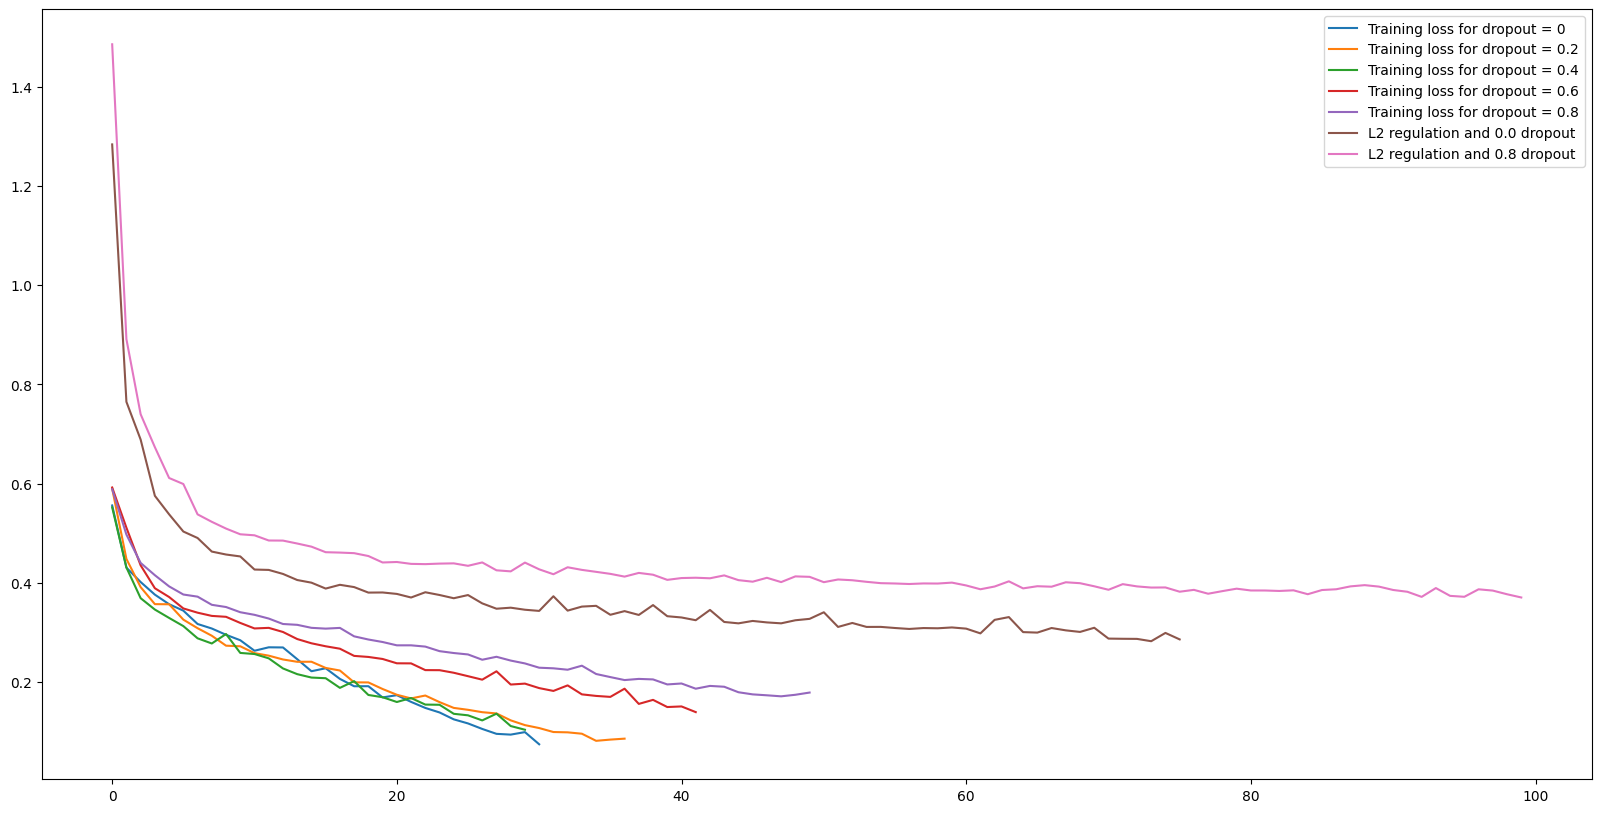

In [ ]:
plt.figure(figsize=(20, 10))

for index, dropout in enumerate(dropouts):
  plt.plot(all_losses[index], label=f"Training loss for dropout = {dropout}")

plt.plot(losses1, label=f"L2 regulation and 0.0 dropout")
plt.plot(losses2, label=f"L2 regulation and 0.8 dropout")
plt.legend()

print("Iteraciones con dropout = 0.0: " + str(len(losses1)))
print("Iteraciones con dropout = 0.8: " + str(len(losses2)))

El primer fenómeno a comentar es el hecho de que el valor de pérdida de los modelos con regularización L2 empieza por encima de 1. Esto es debido a la definición de la regularización L2: es una técnica para evitar el sobreajustado, añadiendo una penalización al valor de pérdida. Esta penalización es la suma de los cuadrados de todas las ponderaciones de los pesos, la cual se suma al valor de pérdida como tal. Por tanto, si los valores iniciales de los pesos son altos, es nomal que la pérdida inicial sea mucho mayor, superando el valor de 1.

El objetivo de la regularización L2 es mejorar el valor de pérdida de la validación, y, como se ha comentado ya, evitar el sobreajustado.

También podemos observar cómo los nuevos modelos con regularización L2 tardan más en entrenarse, llegando incluso al final de la ejecución sin que actue el callback de earlystop, lo que significa que el valor de "val_loss" seguía mejorando hasta el final como veremos a continuación:

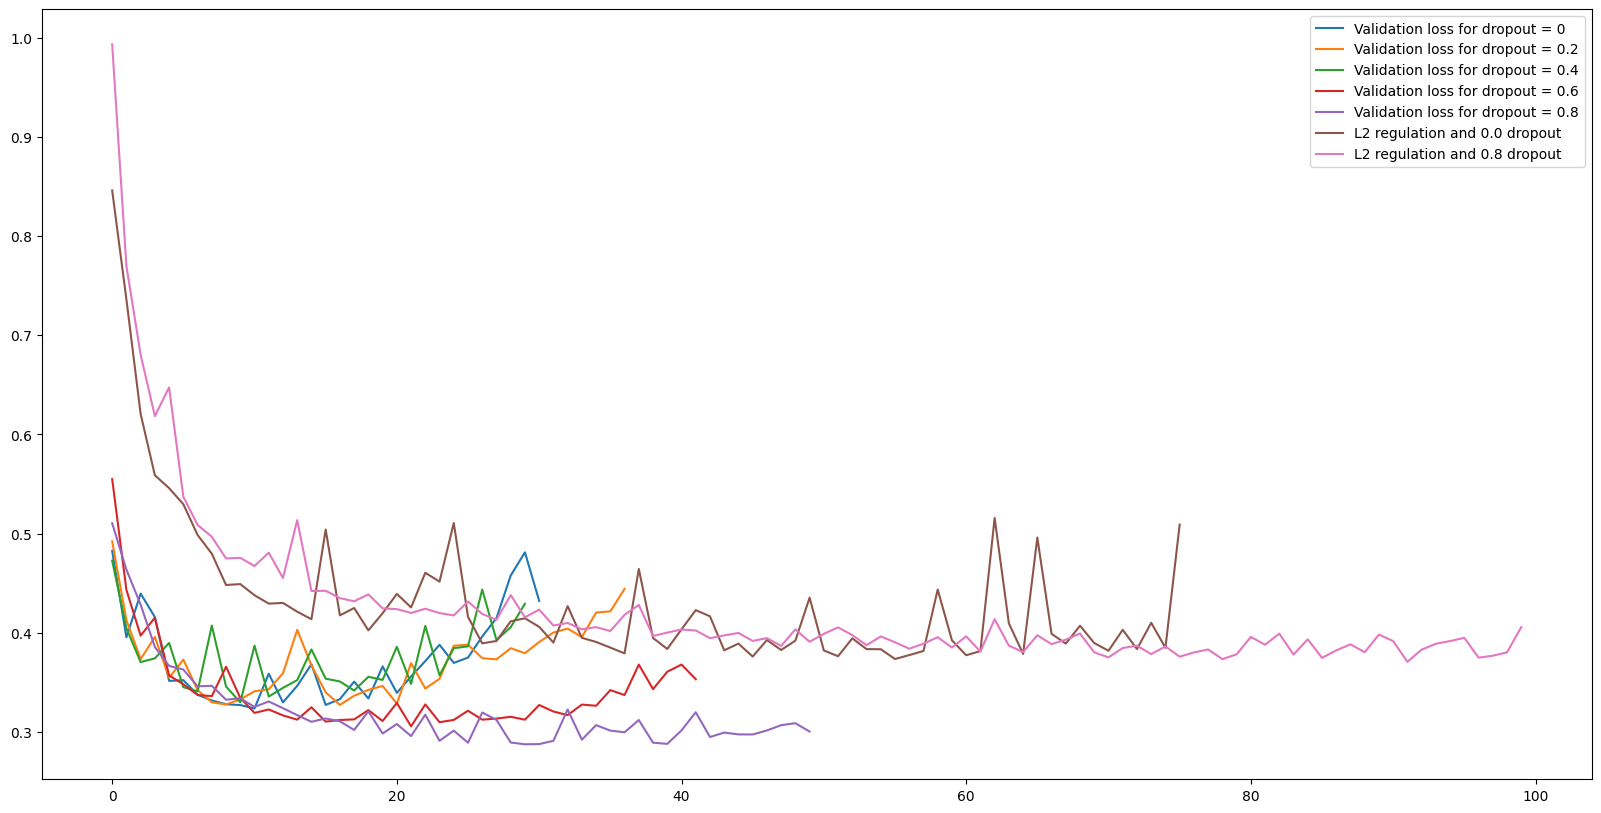

In [ ]:
plt.figure(figsize=(20, 10))

for index, dropout in enumerate(dropouts):
  plt.plot(all_val_losses[index], label=f"Validation loss for dropout = {dropout}")

plt.plot(val_losses1, label=f"L2 regulation and 0.0 dropout")
plt.plot(val_losses2, label=f"L2 regulation and 0.8 dropout")
plt.legend()

Podemos ver un patrón similar donde los valores de val_loss de los dos nuevos modelos empiezan siendo mucho más altos que el resto y en las primeras 15-20 iteraciones mejora enormemente.

Los modelos que antes finalizan el entrenamiento son los modelos con menor dropout y sin regularización L2, dado que por *overfitting*, los valores de pérdida en la validación dejan de mejorar muy temprano.

Luego se encuentran los modelos con mayor dropout pero sin regularización L2, los cuales tardan más en entrenarse que los anteriores, y son los que mejor valor de pérdida presentan.

Para finalizar están los modelos con regularización L2, tanto con dropout como sin dropout. Se puede observar cómo ambos son los modelos que más tardan en entrenar. De entre los dos últimos, vemos cómo el que cuenta con un dropout de 0.8 tiene un entrenamiento más estable y con menos fluctuaciones que el que no cuenta con dropout. Esto puede ser debido por el hecho de usar dropout, dado que el modelo es capaz de generalizar mejor los datos que no ha visto, dando resultados más estables.
Por el lado contrario, el modelo sin dropout habrá recogido más ruido, y por ende, dependiendo los valores de entrada, las predicciones son mejores o mucho peores, factor aleatorio que se muestra en los picos de los valores de pérdida en su gráfca de "val_loss".

In [ ]:
from sklearn.metrics import accuracy_score

train_accs = []
test_accs = []

#First 5 models
for model_idx, dropout in enumerate(dropouts):
  model_list_only_dropout[model_idx].load_weights('./modelckpt_' + str(dropout)).expect_partial()
  prediction_train = model_list_only_dropout[model_idx].predict(X_train_normalized)
  prediction_test = model_list_only_dropout[model_idx].predict(X_test_normalized)

  # Binarize prediction
  bin_prediction_train = (prediction_train>0.5)*1
  bin_prediction_test = (prediction_test>0.5)*1

  train_acc = accuracy_score(y_train, bin_prediction_train)
  test_acc = accuracy_score(y_test, bin_prediction_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

#2 models with L2 regulation
model_l2_dropout_0.load_weights('./modelckpt_L2_0').expect_partial()
prediction_train = model_l2_dropout_0.predict(X_train_normalized)
prediction_test = model_l2_dropout_0.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs.append(train_acc)
test_accs.append(test_acc)

model_l2_dropout_08.load_weights('./modelckpt_L2_0.8').expect_partial()
prediction_train = model_l2_dropout_08.predict(X_train_normalized)
prediction_test = model_l2_dropout_08.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs.append(train_acc)
test_accs.append(test_acc)

63/63 [==============================] - 0s 2ms/step


In [ ]:
dropouts = [str(dropout) for dropout in dropouts]
dropouts = dropouts + ["L2 regularization 0", "L2 regularization 0.8"]

df = pd.DataFrame({'Dropout': dropouts, 'Train_accs': train_accs, 'Test_accs': test_accs})

print(df)

                 Dropout  Train_accs  Test_accs
0                      0      0.8994     0.8700
1                    0.2      0.9277     0.8695
2                    0.4      0.9101     0.8590
3                    0.6      0.9254     0.8715
4                    0.8      0.9404     0.8835
5    L2 regularization 0      0.9179     0.8745
6  L2 regularization 0.8      0.8946     0.8720


Podemos observar que la mejor precisión con los datos de test es la perteneciente al modelo con dropout = 0.8, lo que indica que esta técnica cumple con su objetivo correctamente con el modelo utilizado y el dataset en cuestión.

Este modelo con dropout también es mejor que el mismo pero añadiendo regularización L2. Esto puede indicar que el uso de estos dos métodos de reguralización está **sobreregularizando** el modelo, lo que deriva en un subajustado del modelo, lo que significa que el modelo es más general, captura peor las características generales y diferencia peor entre clases.

# Apartado C
La profundidad de una red da ciertas ventajas en problemas complejos. Añadid sucesivamente a la red inicial después de la primera capa convolucional más capas convolucionales con número de filtros de 16 a 128 siguiendo las potencias de 2 y entrenad las redes para cada tamaño, utilizando dropout de 0.8 y regularización L2.

Calculad el acierto sobre los datos de entrenamiento y el conjunto de test y representad la evolución de la función de pérdida para los datos de entrenamiento y test de las redes.

Procedemos a probar con todas las combinaciones, empezando por añadir 16 filtros:

### 2 Convolucionales - hasta 16 filtros

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv_2 = keras.models.Sequential()
model_conv_2.add(keras.Input(shape=(32, 32, 3)))
model_conv_2.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv_2.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv_2.add(keras.layers.Flatten())
model_conv_2.add(keras.layers.Dropout(dropout))
model_conv_2.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv_2.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv_2.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_2', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv_2.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_16 = res.history['loss']
val_losses_16 = res.history['val_loss']

print(losses_16)
print(val_losses_16)
print()

Dropout: 0.8
[1.2022061347961426, 0.7482367157936096, 0.6421546339988708, 0.5974262952804565, 0.5310813784599304, 0.5147624015808105, 0.497707337141037, 0.47905194759368896, 0.4746984839439392, 0.46752801537513733, 0.46284711360931396, 0.4565581977367401, 0.4463551640510559, 0.44209232926368713, 0.43964648246765137, 0.4360405206680298, 0.4329521059989929, 0.4222835898399353, 0.42712563276290894, 0.422451913356781, 0.4244142472743988, 0.40856805443763733, 0.4115965962409973, 0.4018351137638092, 0.4074340760707855, 0.403001606464386, 0.40727174282073975, 0.4115995168685913, 0.4016645848751068, 0.3960894048213959, 0.3873022496700287, 0.38468796014785767, 0.3844943046569824, 0.38902512192726135, 0.4023527503013611, 0.3911256492137909, 0.3789744973182678, 0.3742038607597351, 0.3801281452178955, 0.37948718667030334, 0.3833402991294861, 0.3897073566913605, 0.3797861933708191, 0.3781589865684509, 0.37045761942863464, 0.3678254783153534, 0.3687838912010193, 0.3626387119293213, 0.368665069341659

### 3 Convolucionales - hasta 32 filtros

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv_3 = keras.models.Sequential()
model_conv_3.add(keras.Input(shape=(32, 32, 3)))
model_conv_3.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv_3.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv_3.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv_3.add(keras.layers.Flatten())
model_conv_3.add(keras.layers.Dropout(dropout))
model_conv_3.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv_3.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv_3.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_3', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv_3.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_32 = res.history['loss']
val_losses_32 = res.history['val_loss']

print(losses_32)
print(val_losses_32)
print()

Dropout: 0.8
[1.1761754751205444, 0.7565101981163025, 0.6842085719108582, 0.5954534411430359, 0.5652437210083008, 0.517208456993103, 0.48417729139328003, 0.47446519136428833, 0.48199301958084106, 0.45180967450141907, 0.4396216869354248, 0.44842568039894104, 0.421031653881073, 0.41494202613830566, 0.4158063530921936, 0.41863563656806946, 0.40319493412971497, 0.39906302094459534, 0.4118253290653229, 0.3908253312110901, 0.3900105059146881, 0.4045860767364502, 0.4025283455848694, 0.38155755400657654, 0.389844685792923, 0.3834525942802429, 0.3806692361831665, 0.3803694248199463, 0.3791329562664032, 0.3741110861301422, 0.3802493214607239, 0.37807559967041016, 0.39376112818717957, 0.3760750889778137, 0.37419795989990234, 0.3632720112800598, 0.3598846197128296, 0.35666346549987793, 0.3657156527042389, 0.38136881589889526, 0.383213073015213, 0.3797767162322998, 0.3565523624420166, 0.3637877106666565, 0.3666011095046997, 0.3517892062664032, 0.3550555408000946, 0.3575759530067444, 0.3602882921695

### 4 Convolucionales - hasta 64 filtros

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv_4 = keras.models.Sequential()
model_conv_4.add(keras.Input(shape=(32, 32, 3)))
model_conv_4.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv_4.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv_4.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv_4.add(keras.layers.Conv2D(8*filters, (3, 3), activation='relu'))
model_conv_4.add(keras.layers.Flatten())
model_conv_4.add(keras.layers.Dropout(dropout))
model_conv_4.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv_4.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv_4.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_4', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv_4.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_64 = res.history['loss']
val_losses_64 = res.history['val_loss']

print(losses_64)
print(val_losses_64)
print()

Dropout: 0.8
[1.1505934000015259, 0.7434985041618347, 0.6544570326805115, 0.5741432905197144, 0.5327979922294617, 0.5096885561943054, 0.4762985408306122, 0.43910157680511475, 0.4463593363761902, 0.43247783184051514, 0.415486216545105, 0.41510653495788574, 0.4051828980445862, 0.38974085450172424, 0.3933301568031311, 0.39408713579177856, 0.38922181725502014, 0.41319677233695984, 0.3817955255508423, 0.370172917842865, 0.37661096453666687, 0.3774617314338684, 0.386222243309021, 0.3758951425552368, 0.3722141981124878, 0.3582761585712433, 0.38282349705696106, 0.36428123712539673, 0.39800629019737244, 0.3621397614479065, 0.35216760635375977, 0.34593477845191956, 0.3346267342567444, 0.3379783630371094, 0.34474027156829834, 0.3581904172897339, 0.34123289585113525, 0.3351131081581116, 0.33338260650634766, 0.3394257724285126, 0.32404759526252747, 0.3439110219478607, 0.3413810729980469, 0.3253227174282074, 0.34800246357917786, 0.32429230213165283, 0.31653136014938354, 0.32994362711906433, 0.310613

### 5 Convolucionales - hasta 128 filtros

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv_5 = keras.models.Sequential()
model_conv_5.add(keras.Input(shape=(32, 32, 3)))
model_conv_5.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv_5.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv_5.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv_5.add(keras.layers.Conv2D(8*filters, (3, 3), activation='relu'))
model_conv_5.add(keras.layers.Conv2D(16*filters, (3, 3), activation='relu'))
model_conv_5.add(keras.layers.Flatten())
model_conv_5.add(keras.layers.Dropout(dropout))
model_conv_5.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv_5.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv_5.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_5', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv_5.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_128 = res.history['loss']
val_losses_128 = res.history['val_loss']

print(losses_128)
print(val_losses_128)
print()

Dropout: 0.8
[1.1141539812088013, 0.7151366472244263, 0.6280002593994141, 0.5679187774658203, 0.4891999363899231, 0.5125157833099365, 0.4460184574127197, 0.43193182349205017, 0.4260700047016144, 0.41270145773887634, 0.40603217482566833, 0.38592737913131714, 0.3965221643447876, 0.3977336883544922, 0.3784473240375519, 0.3882020115852356, 0.36596405506134033, 0.37873712182044983, 0.3499736785888672, 0.37838172912597656, 0.35361671447753906, 0.3535356819629669, 0.35608434677124023, 0.36535611748695374, 0.33136311173439026, 0.3535822033882141, 0.33558574318885803, 0.3369748294353485, 0.3387778699398041, 0.33376461267471313, 0.3279203176498413, 0.32779303193092346, 0.32016193866729736, 0.33828288316726685, 0.33376723527908325, 0.3388456404209137, 0.30880874395370483, 0.30346035957336426, 0.31092241406440735, 0.3173050284385681, 0.3028963506221771, 0.3007343113422394, 0.326119601726532, 0.3013707399368286, 0.299098402261734, 0.2915022671222687, 0.3036547601222992, 0.30663982033729553, 0.29208

Veamos la evolución del los modelos al entrenar y cuánto se equivoca el modelo durante el entrenamiento:

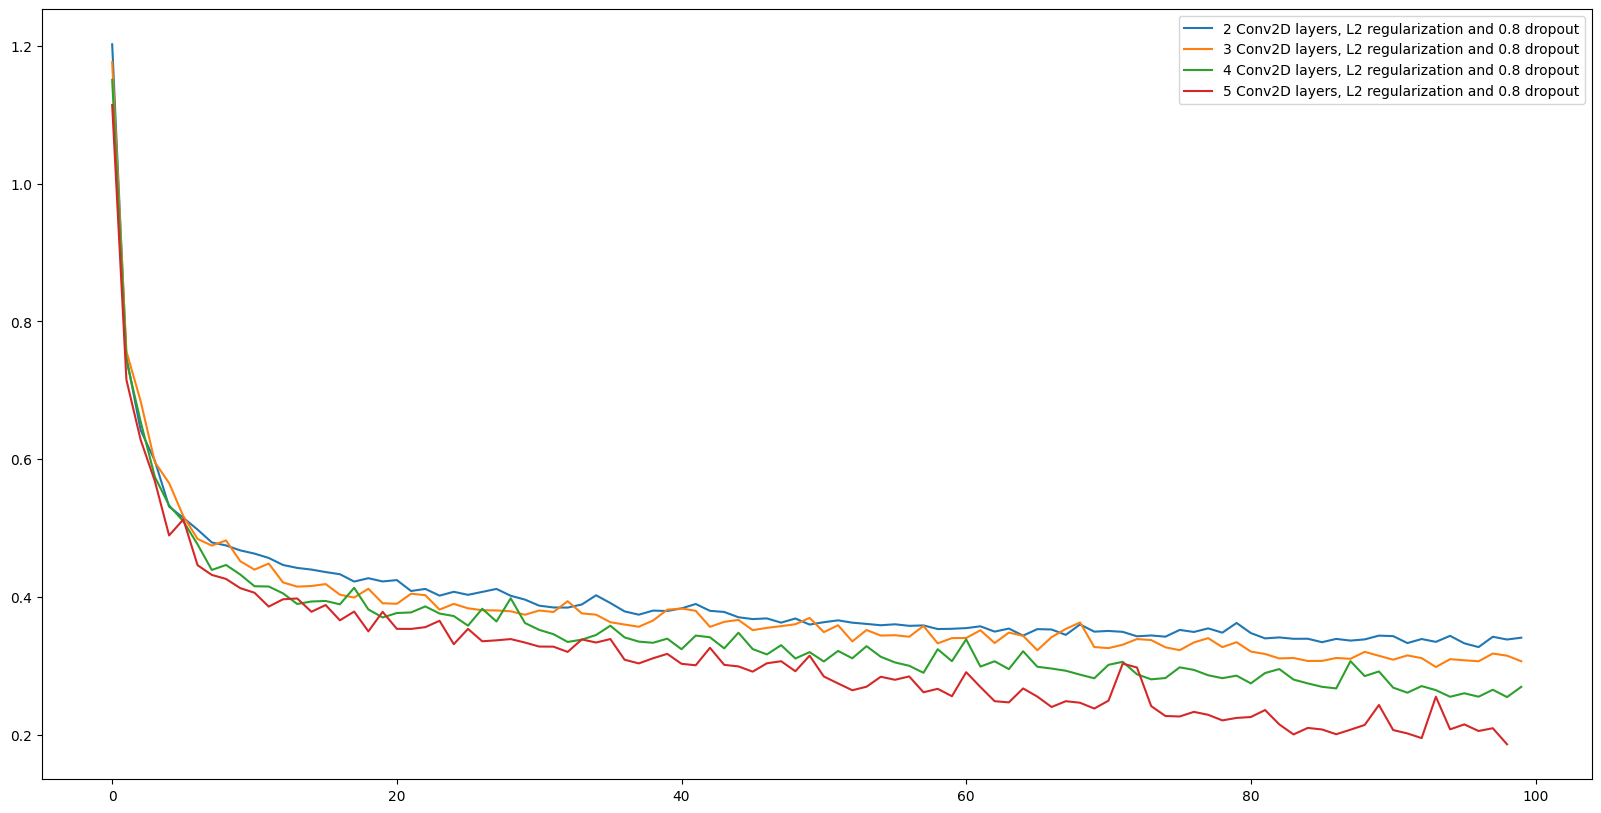

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(losses_16, label=f"2 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_32, label=f"3 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_64, label=f"4 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_128, label=f"5 Conv2D layers, L2 regularization and 0.8 dropout")
plt.legend()

Podemos ver en la representación de la pérdida en el entrenamiento que los 3 modelos se comportan de manera parecida, probablemente debido al valor de dropout ya que es el mismo. Se puede ver una tendencia a que contra más capas convolucionales y cada una con más filtros que la anterior, el modelo resultante obtiene menores valores de la función de pérdida que el resto. Este hecho tiene lógica, dado que cuanta mayor sea la cantidad de capas y filtros, mayor es la cantidad de parámetros, y mejor complejidad se puede percibir de los datos. Ya se sabe que esta complejidad no siempre es buena y no hay que fiarse del todo de los resultados en el set de entrenamiento, por eso hay que validar el entrenamiento con el set de test.

Por otro lado, la curva de aprendizaje parece similar en los datos de entrenamiento ya que en todas se puede ver un descenso grande en las primeras iteraciones para luego va poco a poco mejorando su pérdida hasta que va convergiendo.

Esto sería cómo el modelo está desempeñándose en datos que no ha visto:

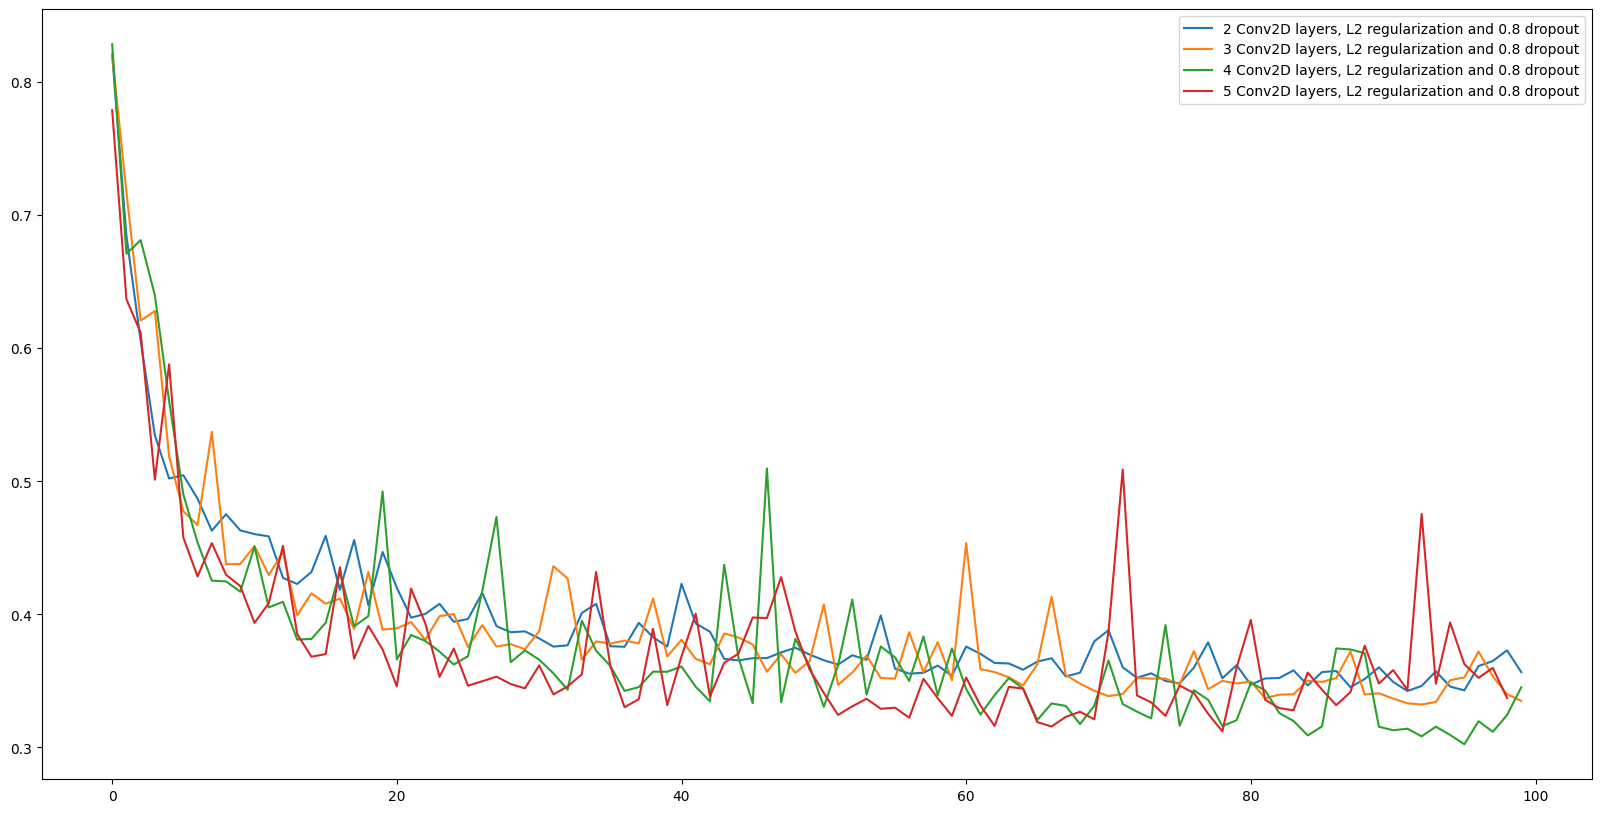

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(val_losses_16, label=f"2 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_32, label=f"3 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_64, label=f"4 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_128, label=f"5 Conv2D layers, L2 regularization and 0.8 dropout")
plt.legend()

Se puede observar como cuanta mayor es la cantidad de capas, hay una mayor cantidad de picos. Esto es debido al mencionado sobreajustado del modelo por capturar demasiada complejidad. Estos picos, como ya se ha explicado, significa que con cierta probabilidad, hay validaciones que el modelo, al estar demasiado ajustado, da peor resultado.

Algunas funciones de activación, como es nuestro caso de *Sigmoid*, empequeñecen un gran input a un pequeño output como puede ser 0 o 1. De esta manera, un gran cambio en el input de la función de sigmoid causa un cambio pequeño en el output, y por tanto, la derivada es pequeña.

La retropropagación encuentra las derivadas con respecto a los pesos de la red neuronal desde el final hasta el inicio de la red, multiplicando estas derivadas desde final a inicio utilizando la regla de la cadena. A causa de esto, se van acumulando multiplicaciones de derivadas pequeñas, haciéndolas cada vez más pequeñas, hasta el punto de no actualizar ningún parámetro en las capas iniciales. Este problema es conocido como el problema de **desvanecimiento de gradiente**.

Por este hecho podemos concluir que no siempre más capas significa mejores resultados, y elegir mayor o menor cantidad de capas depende de los datos de entrada y de la estructura de la red neuronal.

In [ ]:
train_accs_conv = []
test_accs_conv = []

#2 conv layers
model_conv_2.load_weights('./modelckpt_L2_0.8_conv_2').expect_partial()
prediction_train = model_conv_2.predict(X_train_normalized)
prediction_test = model_conv_2.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_conv.append(train_acc)
test_accs_conv.append(test_acc)

#3 conv layers
model_conv_3.load_weights('./modelckpt_L2_0.8_conv_3').expect_partial()
prediction_train = model_conv_3.predict(X_train_normalized)
prediction_test = model_conv_3.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_conv.append(train_acc)
test_accs_conv.append(test_acc)


#4 conv layers
model_conv_4.load_weights('./modelckpt_L2_0.8_conv_4').expect_partial()
prediction_train = model_conv_4.predict(X_train_normalized)
prediction_test = model_conv_4.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_conv.append(train_acc)
test_accs_conv.append(test_acc)


#5 conv layers
model_conv_5.load_weights('./modelckpt_L2_0.8_conv_5').expect_partial()
prediction_train = model_conv_5.predict(X_train_normalized)
prediction_test = model_conv_5.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_conv.append(train_acc)
test_accs_conv.append(test_acc)

conv_layers = ['2 conv layers', '3 conv layers', '4 conv layers', '5 conv layers']
df = pd.DataFrame({'Conv layers': conv_layers, 'Train_accs': train_accs_conv, 'Test_accs': test_accs_conv})

print(df)

63/63 [==============================] - 0s 3ms/step
     Conv layers  Train_accs  Test_accs
0  2 conv layers      0.9068     0.8800
1  3 conv layers      0.9212     0.8875
2  4 conv layers      0.9498     0.9115
3  5 conv layers      0.9669     0.9130


Observamos como el modelo que mejor resultado ha dado es aquel con 5 capas convolucionales.

A pesar de ello, todos dan un resultado muy parecido, lo que indica que estamos en un rango de capas que realmente no afecta a los resultados, y no tendría sentido seguir añadiendo, dado que los datos no son tan complejos como para que con un mayor número de capas mejore los resultados. Es decir, los datos no tienen tantas características como para que un mayor número de capas mejore los resultados obtenidos.



# Apartado D
El ir añadiendo más y más capas aumenta bastante el número de parámetros que tiene el modelo. Una manera de reducirlos es ir reduciendo poco a poco la salida de cada capa. En redes convolucionales se utilizan capas de *pooling* que reducen las dimensiones espaciales, por ejemplo haciendo un cálculo con las posiciones vecinas (media/máximo). Vamos a usar capas de max pooling interpuestas entre las capas convolucionales.

Estas capas calculan el máximo de posiciones adyacentes colocadas en cuadrículas 2 × 2 reduciendo a una cuarta parte los valores que se pasan a la siguiente capa.

Veamos las mismas combinaciones de redes anteriores pero ahora con MaxPooling:

In [ ]:
model_size = []

### 2 Convolucionales

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv2_maxpool = keras.models.Sequential()
model_conv2_maxpool.add(keras.Input(shape=(32, 32, 3)))
model_conv2_maxpool.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv2_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv2_maxpool.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv2_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv2_maxpool.add(keras.layers.Flatten())
model_conv2_maxpool.add(keras.layers.Dropout(dropout))
model_conv2_maxpool.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv2_maxpool.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv2_maxpool.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_maxpooling_2', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv2_maxpool.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv2_maxpool.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_16 = res.history['loss']
val_losses_16 = res.history['val_loss']
acc_16 = res.history['accuracy']
val_acc_16 = res.history['val_accuracy']

total_params = sum([layer.count_params() for layer in model_conv2_maxpool.layers])
model_size.append(total_params)

print(losses_16)
print(val_losses_16)
print(acc_16)
print(val_acc_16)
print()

Dropout: 0.8
[1.3446109294891357, 0.7826574444770813, 0.6471409797668457, 0.5715175867080688, 0.5400500297546387, 0.4923441410064697, 0.46798092126846313, 0.4524592161178589, 0.4449950158596039, 0.4334668815135956, 0.4300399422645569, 0.419221431016922, 0.43388035893440247, 0.41355618834495544, 0.410674124956131, 0.40484246611595154, 0.42745423316955566, 0.40782827138900757, 0.4010055363178253, 0.40668582916259766, 0.3959231972694397, 0.39276549220085144, 0.3907661437988281, 0.3822712004184723, 0.3769906759262085, 0.3846875727176666, 0.37892064452171326, 0.37851646542549133, 0.3788321018218994, 0.37765613198280334, 0.37896278500556946, 0.3797457218170166, 0.3837752938270569, 0.37605583667755127, 0.36690598726272583, 0.3773707151412964, 0.374126672744751, 0.36391523480415344, 0.36826834082603455, 0.36698636412620544, 0.3681633770465851, 0.36732718348503113, 0.3662770092487335, 0.36935490369796753, 0.363340824842453, 0.3617420792579651, 0.35212793946266174, 0.36159515380859375, 0.3597951

### 3 Convolucionales

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv3_maxpool = keras.models.Sequential()
model_conv3_maxpool.add(keras.Input(shape=(32, 32, 3)))
model_conv3_maxpool.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv3_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv3_maxpool.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv3_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv3_maxpool.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv3_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv3_maxpool.add(keras.layers.Flatten())
model_conv3_maxpool.add(keras.layers.Dropout(dropout))
model_conv3_maxpool.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv3_maxpool.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv3_maxpool.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_maxpooling_3', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv3_maxpool.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv3_maxpool.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_32 = res.history['loss']
val_losses_32 = res.history['val_loss']
acc_32 = res.history['accuracy']
val_acc_32 = res.history['val_accuracy']

total_params = sum([layer.count_params() for layer in model_conv3_maxpool.layers])
model_size.append(total_params)

print(losses_32)
print(val_losses_32)
print(acc_32)
print(val_acc_32)
print()

Dropout: 0.8
[1.2096500396728516, 0.7689321041107178, 0.6464887261390686, 0.5843972563743591, 0.5732353329658508, 0.518440842628479, 0.4888538718223572, 0.46464404463768005, 0.46701186895370483, 0.45159879326820374, 0.4282158613204956, 0.42273300886154175, 0.4272712767124176, 0.4427887201309204, 0.4056069254875183, 0.3994271159172058, 0.4036130905151367, 0.39617007970809937, 0.3871735632419586, 0.38819608092308044, 0.3931799530982971, 0.3750571608543396, 0.3655111491680145, 0.38742494583129883, 0.3654031753540039, 0.36473941802978516, 0.3488369584083557, 0.36434274911880493, 0.38074538111686707, 0.3501437306404114, 0.35294273495674133, 0.3507870137691498, 0.32768258452415466, 0.3387812077999115, 0.3355424404144287, 0.3300396800041199, 0.34462350606918335, 0.34264588356018066, 0.3793236315250397, 0.3361705243587494, 0.3171944320201874, 0.32117658853530884, 0.32922425866127014, 0.3303055763244629, 0.3137105703353882, 0.30499300360679626, 0.30576857924461365, 0.3217814266681671, 0.3124457

### 4 Convolucionales

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv4_maxpool = keras.models.Sequential()
model_conv4_maxpool.add(keras.Input(shape=(32, 32, 3)))
model_conv4_maxpool.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv4_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv4_maxpool.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv4_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv4_maxpool.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv4_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv4_maxpool.add(keras.layers.Conv2D(8*filters, (3, 3), activation='relu'))
model_conv4_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv4_maxpool.add(keras.layers.Flatten())
model_conv4_maxpool.add(keras.layers.Dropout(dropout))
model_conv4_maxpool.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv4_maxpool.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv4_maxpool.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_maxpooling_4', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv4_maxpool.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv4_maxpool.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_64 = res.history['loss']
val_losses_64 = res.history['val_loss']
acc_64 = res.history['accuracy']
val_acc_64 = res.history['val_accuracy']

total_params = sum([layer.count_params() for layer in model_conv4_maxpool.layers])
model_size.append(total_params)

print(losses_64)
print(val_losses_64)
print(acc_64)
print(val_acc_64)
print()

Dropout: 0.8
[1.1634547710418701, 0.7314017415046692, 0.6192730069160461, 0.5668694972991943, 0.5363019108772278, 0.497708261013031, 0.4696923792362213, 0.46530404686927795, 0.43711885809898376, 0.4287464916706085, 0.4269413650035858, 0.4260164201259613, 0.4308082163333893, 0.4156000018119812, 0.38864627480506897, 0.4006114602088928, 0.3985210359096527, 0.37050002813339233, 0.37103980779647827, 0.38583070039749146, 0.3733924329280853, 0.3834887146949768, 0.37452781200408936, 0.35868409276008606, 0.35785937309265137, 0.3576187789440155, 0.3430647552013397, 0.3486715257167816, 0.37117233872413635, 0.34110838174819946, 0.33355364203453064, 0.33443328738212585, 0.3299560844898224, 0.3260020911693573, 0.34825822710990906, 0.32979050278663635, 0.3281193673610687, 0.32838964462280273, 0.3258945643901825, 0.3356456756591797, 0.3182710111141205, 0.3075321614742279, 0.31406113505363464, 0.31081295013427734, 0.30258846282958984, 0.3101767897605896, 0.2918179929256439, 0.30526262521743774, 0.31608

### 5 Convolucionales

In [ ]:
dropout = 0.8
filters = 8

print('Dropout: {}'.format(dropout))
model_conv5_maxpool = keras.models.Sequential()
model_conv5_maxpool.add(keras.Input(shape=(32, 32, 3)))
model_conv5_maxpool.add(keras.layers.Conv2D(filters, (3, 3), activation='relu'))
model_conv5_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv5_maxpool.add(keras.layers.Conv2D(2*filters, (3, 3), activation='relu'))
model_conv5_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv5_maxpool.add(keras.layers.Conv2D(4*filters, (3, 3), activation='relu'))
model_conv5_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv5_maxpool.add(keras.layers.Conv2D(8*filters, (3, 3), activation='relu'))
model_conv5_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv5_maxpool.add(keras.layers.Conv2D(16*filters, (3, 3), activation='relu'))
model_conv5_maxpool.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model_conv5_maxpool.add(keras.layers.Flatten())
model_conv5_maxpool.add(keras.layers.Dropout(dropout))
model_conv5_maxpool.add(keras.layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_conv5_maxpool.add(keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'))
model_conv5_maxpool.add(keras.layers.Dense(1, activation='sigmoid'))

early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
ckpt = keras.callbacks.ModelCheckpoint('modelckpt_L2_0.8_conv_maxpooling_5', monitor='val_loss', save_best_only=True, save_weights_only=True)

model_conv5_maxpool.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
res = model_conv5_maxpool.fit(X_train_normalized, y_train, epochs=100, batch_size=256, verbose=0, validation_data=(X_test_normalized, y_test),
                callbacks=[early, ckpt])

losses_128 = res.history['loss']
val_losses_128 = res.history['val_loss']
acc_128 = res.history['accuracy']
val_acc_128 = res.history['val_accuracy']

total_params = sum([layer.count_params() for layer in model_conv5_maxpool.layers])
model_size.append(total_params)

print(losses_128)
print(val_losses_128)
print(acc_128)
print(val_acc_128)
print()

Dropout: 0.8
[1.166264295578003, 0.7375436425209045, 0.5965326428413391, 0.5337380766868591, 0.5001668334007263, 0.4629411995410919, 0.4423053562641144, 0.446598082780838, 0.4305005371570587, 0.38340720534324646, 0.42443394660949707, 0.37150418758392334, 0.3753148317337036, 0.3829965591430664, 0.36200714111328125, 0.3611336648464203, 0.34387603402137756, 0.3664802610874176, 0.3532773554325104, 0.3347981572151184, 0.34974807500839233, 0.3350266218185425, 0.33103030920028687, 0.33224862813949585, 0.33631202578544617, 0.3244093656539917, 0.31972232460975647, 0.31452247500419617, 0.31035080552101135, 0.3003096878528595, 0.3329326808452606, 0.30149978399276733, 0.30757424235343933, 0.29321011900901794, 0.2901012599468231, 0.2859141230583191, 0.2883776128292084, 0.28714895248413086, 0.30265548825263977, 0.28851908445358276, 0.2816038429737091, 0.27645525336265564, 0.2930466830730438, 0.2693304419517517, 0.2703901529312134, 0.2705649733543396, 0.25246039032936096, 0.25081634521484375, 0.24762

Veamos la evolucion de las funciones tanto de pérdida como acierto para los datos de entrenamiento y test:

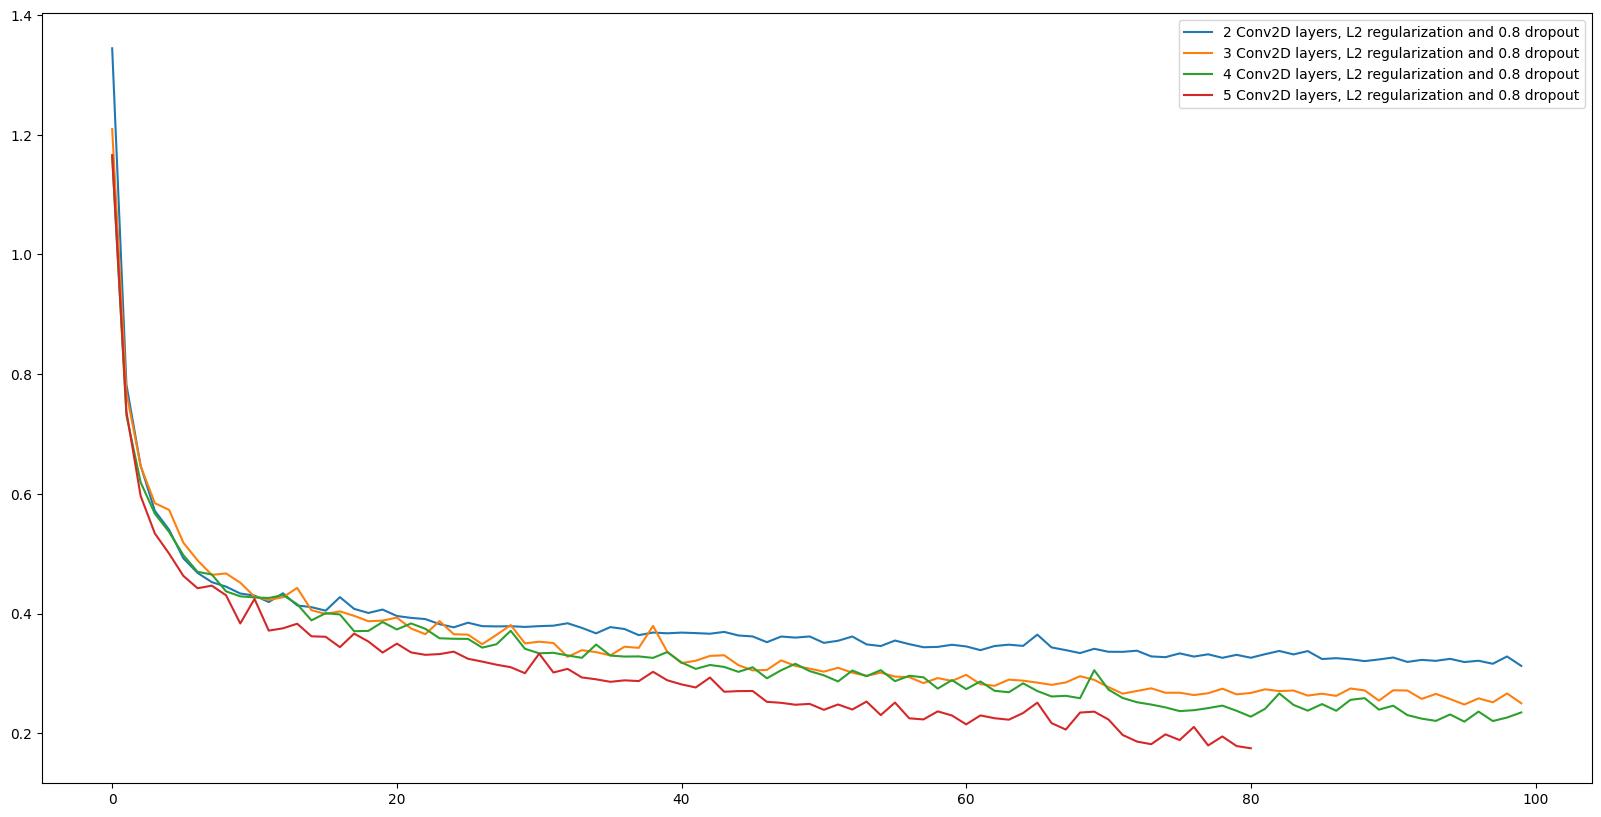

In [ ]:
plt.figure(figsize=(20, 10))


plt.plot(losses_16, label=f"2 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_32, label=f"3 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_64, label=f"4 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(losses_128, label=f"5 Conv2D layers, L2 regularization and 0.8 dropout")
plt.legend()

En este caso seguimos con el mismo patrón que anteriormente, de manera que a la hora de entrenar el modelo, aquellos modelos con mayor número de capas, y por ende más parámetros, son los que mejores resultados obtienen en el set de entrenamiento, incluso añadiendo capas de pooling.

Habrá que volver a analizar los resultados en el set de validación para observar realmente los efectos del maxpool.

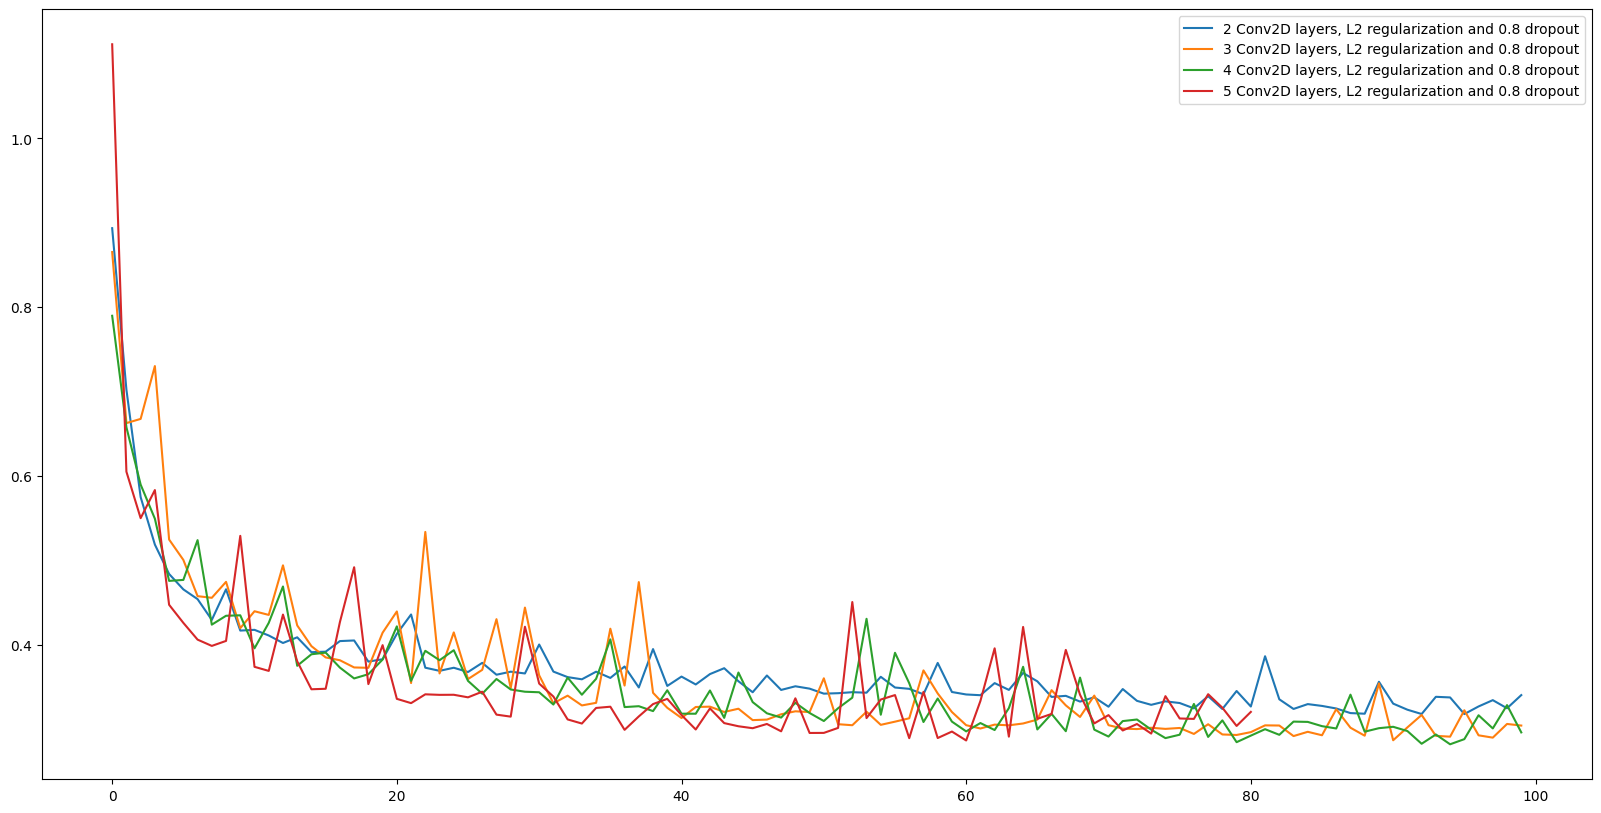

In [ ]:
plt.figure(figsize=(20, 10))


plt.plot(val_losses_16, label=f"2 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_32, label=f"3 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_64, label=f"4 Conv2D layers, L2 regularization and 0.8 dropout")
plt.plot(val_losses_128, label=f"5 Conv2D layers, L2 regularization and 0.8 dropout")
plt.legend()

Se puede observar como los resultados en todos los modelos, de la misma manera que anteriormente sin el *maxpooling*, dan resultados muy parecidos sin importar la cantidad de capas de convolución añadidas.

Cabe destacar una diferencia, y es que al haber añadido capas de pooling después de cada convolución, los datos han sido generalizados aún más, y por ello, han una menor cantidad de picos, y más suaves. Es decir, la curva de los valores de pérdida es más suave respecto los modelos sin *maxpooling*.

*Max Pooling* ayuda a generalizar más el modelo, dado que reduce la dimensionalidad de los datos al coger el valor de píxel máximo dentro del filtro, de manera que se reduce la cantidad de parámetros. Gracias a esto, también reduce el coste computacional de realizar predicciones.

Esta generalización puede ayudar a realizar mejores inferencias con datos que no hemos visto, dado que las capas convolucionales añaden una gran cantidad de parámetros al modelo, pero habiendo visto los buenos resultados que hemos obtenido sin este max pooling, corremos el riesgo de perder la capacidad de detectar algunas de las características, subajustando ligeramente el modelo.

Este último hecho lo validaremos observando la precisión de los modelos con max pooling:

In [ ]:
train_accs_maxpool = []
test_accs_maxpool = []

#2 conv layers
model_conv2_maxpool.load_weights('./modelckpt_L2_0.8_conv_maxpooling_2').expect_partial()
prediction_train = model_conv2_maxpool.predict(X_train_normalized)
prediction_test = model_conv2_maxpool.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_maxpool.append(train_acc)
test_accs_maxpool.append(test_acc)

#3 conv layers
model_conv3_maxpool.load_weights('./modelckpt_L2_0.8_conv_maxpooling_3').expect_partial()
prediction_train = model_conv3_maxpool.predict(X_train_normalized)
prediction_test = model_conv3_maxpool.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_maxpool.append(train_acc)
test_accs_maxpool.append(test_acc)


#4 conv layers
model_conv4_maxpool.load_weights('./modelckpt_L2_0.8_conv_maxpooling_4').expect_partial()
prediction_train = model_conv4_maxpool.predict(X_train_normalized)
prediction_test = model_conv4_maxpool.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_maxpool.append(train_acc)
test_accs_maxpool.append(test_acc)


#5 conv layers
model_conv5_maxpool.load_weights('./modelckpt_L2_0.8_conv_maxpooling_5').expect_partial()
prediction_train = model_conv5_maxpool.predict(X_train_normalized)
prediction_test = model_conv5_maxpool.predict(X_test_normalized)

# Binarize prediction
bin_prediction_train = (prediction_train>0.5)*1
bin_prediction_test = (prediction_test>0.5)*1

train_acc = accuracy_score(y_train, bin_prediction_train)
test_acc = accuracy_score(y_test, bin_prediction_test)

train_accs_maxpool.append(train_acc)
test_accs_maxpool.append(test_acc)

conv_layers = ['2 conv maxpool layers', '3 conv maxpool layers', '4 conv maxpool layers', '5 conv maxpool layers']
df = pd.DataFrame({'Conv layers': conv_layers, 'Train_accs': train_accs_maxpool, 'Test_accs': test_accs_maxpool})

print(df)

63/63 [==============================] - 0s 3ms/step
             Conv layers  Train_accs  Test_accs
0  2 conv maxpool layers      0.9029     0.8805
1  3 conv maxpool layers      0.9403     0.9035
2  4 conv maxpool layers      0.9540     0.9095
3  5 conv maxpool layers      0.9455     0.9015


Podemos apreciar como, generalmente, los resultados no han mejorado, incluso habiendo empeorado ligeramente con los modelos con mayor cantidad de capas.

Esto confirma nuestras sospechas mencionadas anteriormente.

A pesar de ello, los resultados siguen siendo muy buenos.

Tamaño de parametros de cada modelo:



In [ ]:
model_size

[695793, 1091601, 1665105, 2468049]

Como podemos ver en realidad tampoco varia demasiado el tamaño porque como vemos gracias al summary:

In [ ]:
model_conv_5.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 conv2d_100 (Conv2D)         (None, 28, 28, 16)        1168      
                                                                 
 conv2d_101 (Conv2D)         (None, 26, 26, 32)        4640      
                                                                 
 conv2d_102 (Conv2D)         (None, 24, 24, 64)        18496     
                                                                 
 conv2d_103 (Conv2D)         (None, 22, 22, 128)       73856     
                                                                 
 flatten_50 (Flatten)        (None, 61952)             0         
                                                                 
 dropout_50 (Dropout)        (None, 61952)           

In [ ]:
model_conv5_maxpool.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 29, 29, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, 27, 27, 16)        1168      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 26, 26, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_115 (Conv2D)         (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 23, 23, 32)      

Observamos cómo efectivamente, cuanta mayor sea la cantidad de capas, mayor es el número de parámetros. También podemos observar cómo efectivamente, al utilizar max pooling, la cantidad de parámetros se reduce. En el modelo de 5 capas, pasamos de 4067489 parámetros a 2468049 parámetros.

En conclusión, nos quedaremos con los modelos con mayor número de capas convolucionales, debido a que los resultados son los mejores.

Entre utilizar el modelo de 5 capas convolucionales o el modelo de 5 capas convolucionales con max pooling, sabiendo que los resultados son tan parecidos, oscilando alrededor del 90%, nos quedaremos con el modelo con max pooling, dado que contaremos con las ventajas de tener una menor cantidad de parámetros que nos dan los mismos resultados, pero con un rendimiento mejor, con un entrenamiento más rápido y predicciones más rápidas, gracias a la mayor eficiencia computacional.  
